# Import Necessary Libraries

In [16]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
pd.pandas.set_option('display.max_columns',None) #To make sure all the columns are displayed

import warnings
warnings.filterwarnings('ignore')

## Loading the Data

In [17]:
data = pd.read_excel('Credit Card Customer Data.xlsx')
data.head()

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,1,87073,100000,2,1,1,0
1,2,38414,50000,3,0,10,9
2,3,17341,50000,7,1,3,4
3,4,40496,30000,5,1,1,4
4,5,47437,100000,6,0,12,3


## Data Analysis

In [18]:
data.shape

(660, 7)

In [19]:
data.isnull().sum()

Sl_No                  0
Customer Key           0
Avg_Credit_Limit       0
Total_Credit_Cards     0
Total_visits_bank      0
Total_visits_online    0
Total_calls_made       0
dtype: int64

In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660 entries, 0 to 659
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Sl_No                660 non-null    int64
 1   Customer Key         660 non-null    int64
 2   Avg_Credit_Limit     660 non-null    int64
 3   Total_Credit_Cards   660 non-null    int64
 4   Total_visits_bank    660 non-null    int64
 5   Total_visits_online  660 non-null    int64
 6   Total_calls_made     660 non-null    int64
dtypes: int64(7)
memory usage: 36.2 KB


* There are no missing values

In [21]:
data.describe()

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
count,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000
mean,330.500000,55141.443939,34574.242424,4.706061,2.403030,2.606061,3.583333
std,190.669872,25627.772200,37625.487804,2.167835,1.631813,2.935724,2.865317
min,1.000000,11265.000000,3000.000000,1.000000,0.000000,0.000000,0.000000
25%,165.750000,33825.250000,10000.000000,3.000000,1.000000,1.000000,1.000000
50%,330.500000,53874.500000,18000.000000,5.000000,2.000000,2.000000,3.000000
75%,495.250000,77202.500000,48000.000000,6.000000,4.000000,4.000000,5.000000
max,660.000000,99843.000000,200000.000000,10.000000,5.000000,15.000000,10.000000



* A customer carries ~5 CreditCards on an average and visits ~2 times on an average
* There are customers who do not visit banks / online/calls

In [24]:
#Checking the distributions of the interactions

features = ['Total_visits_bank','Total_visits_online','Total_calls_made']

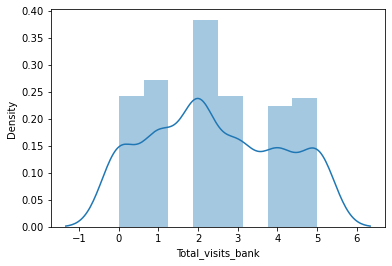

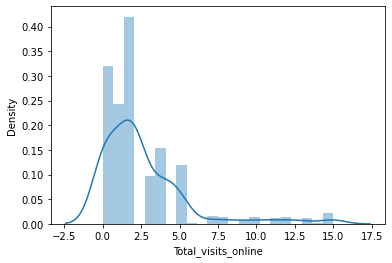

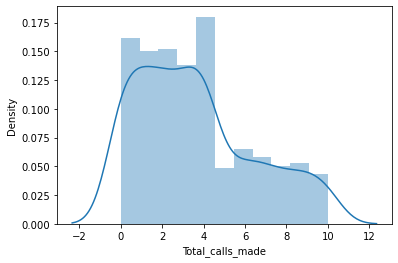

In [25]:
for feature in features:
    sns.distplot(data[feature])
    plt.show()

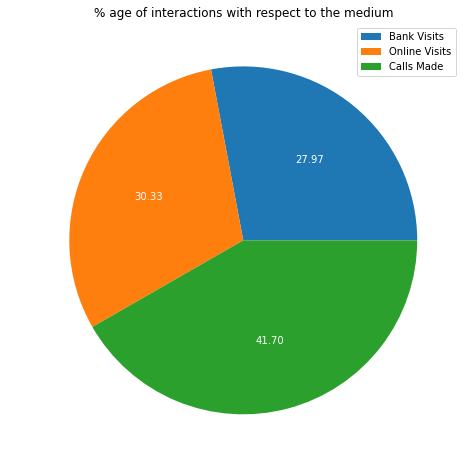

In [38]:
### Creating a new feature with total interaction with banks  for analysis
data1 = data.copy() #Copying the dataset into a new memory
data1['Total_interactions'] = data1['Total_visits_bank'] + data1['Total_visits_online'] + data1['Total_calls_made']
# Total interactions = total calls + totals visits in banks + total online visits
plt.figure(figsize=(12,8))
feature_perc=[]
for feature in features:
    feature_perc.append((data1[feature].sum()/data1['Total_interactions'].sum())*100)
plt.pie(feature_perc,labels=['Bank Visits','Online Visits','Calls Made'],autopct='%1.2f',textprops=dict(color="w"))
plt.legend()
plt.title("% age of interactions with respect to the medium")
plt.show()

In [44]:
data.duplicated().any()

False

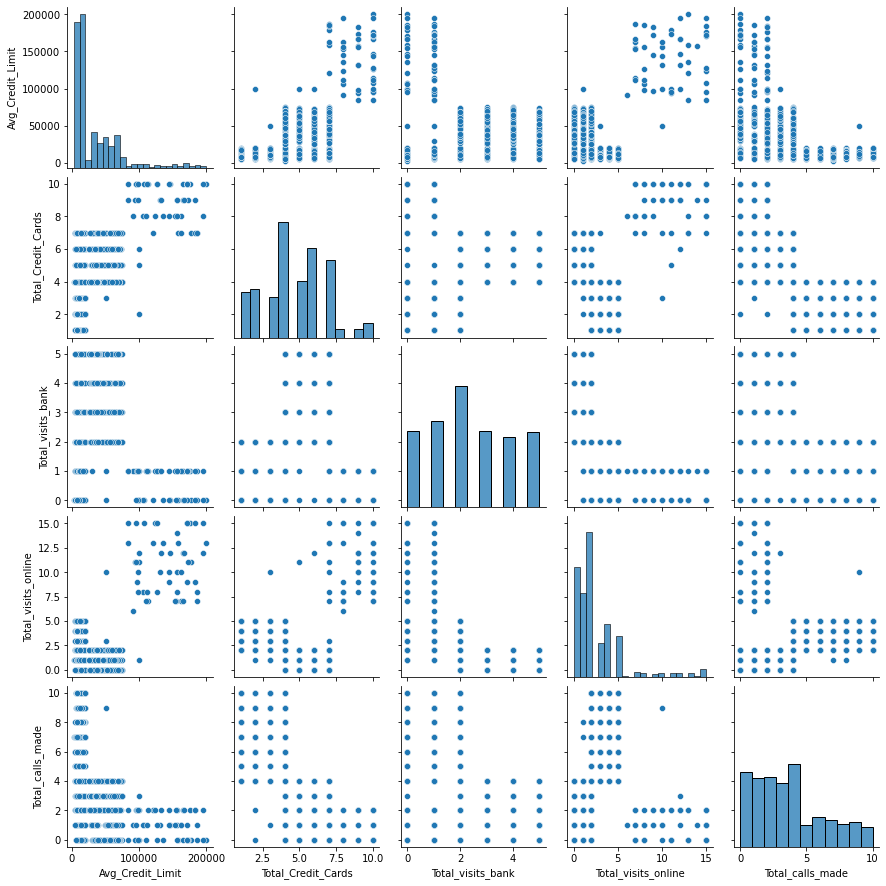

In [45]:
data1 = data.drop(['Sl_No','Customer Key'],axis=1).copy()
sns.pairplot(data1) 

In [46]:
data1.corr()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
Avg_Credit_Limit,1.000000,0.608860,-0.100312,0.551385,-0.414352
Total_Credit_Cards,0.608860,1.000000,0.315796,0.167758,-0.651251
Total_visits_bank,-0.100312,0.315796,1.000000,-0.551861,-0.506016
Total_visits_online,0.551385,0.167758,-0.551861,1.000000,0.127299
Total_calls_made,-0.414352,-0.651251,-0.506016,0.127299,1.000000


<AxesSubplot:>

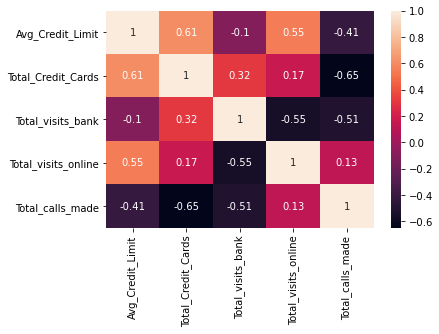

In [49]:
sns.heatmap(data1.corr(),annot= True)

### Total_Credit_Cards v/s Avg_Credit_Limit

<AxesSubplot:xlabel='Avg_Credit_Limit', ylabel='Total_Credit_Cards'>

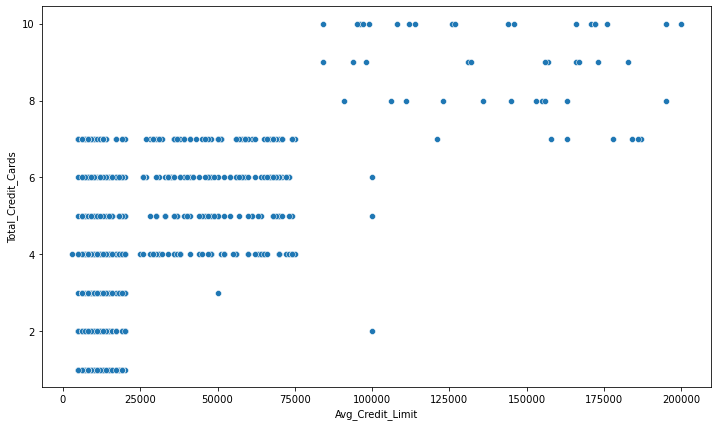

In [50]:
plt.figure(figsize=(12,7))
sns.scatterplot(x  ='Avg_Credit_Limit',y ='Total_Credit_Cards',data = data)

There are two clusters: Customers with Average Credit Limit <100000 And Customers with Average Credit Limit < 75000

### Avg_Credit_Limit vs Total_visits_banks


<AxesSubplot:xlabel='Total_visits_bank', ylabel='Avg_Credit_Limit'>

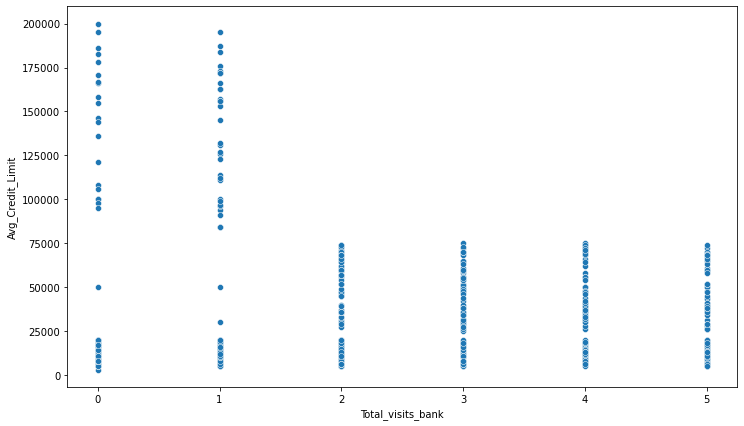

In [52]:
plt.figure(figsize=(12,7))
sns.scatterplot(y  ='Avg_Credit_Limit',x ='Total_visits_bank',data = data)

People with Average Limit > ~70000 make 0 to 1 visits to the bank People with Average Credit Limit < ~70000 visit frequently i.e. 2 to 5 times



### Avg_Credit_Limit v/s Total_visits_online

<AxesSubplot:xlabel='Total_visits_online', ylabel='Avg_Credit_Limit'>

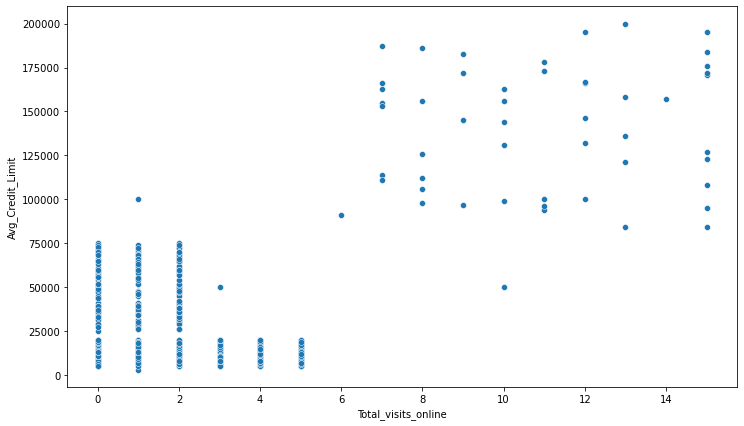

In [53]:
plt.figure(figsize=(12,7))
sns.scatterplot(y  ='Avg_Credit_Limit',x ='Total_visits_online',data = data)

There clearly seems to be differentiated 2 clusters on the basis of above two features

People with Average Credit Limit >75000 visits more frequently online(>7 times)



### Total_Credit_Cards v/s Total_visits_online graph

<AxesSubplot:xlabel='Total_visits_online', ylabel='Total_Credit_Cards'>

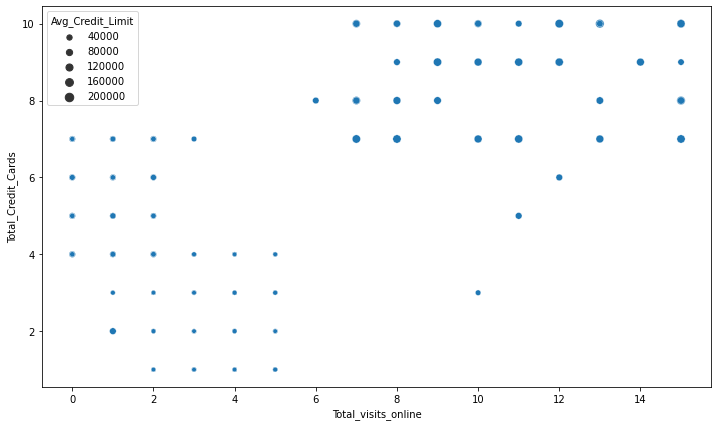

In [54]:
plt.figure(figsize=(12,7))
sns.scatterplot(x='Total_visits_online',y='Total_Credit_Cards',size='Avg_Credit_Limit',data=data) 

Customers with more than 7 credit cards and with Average Limit > 80000 visits online more frequently



### Total_visits_online v/s Total_calls_made

<AxesSubplot:xlabel='Total_visits_online', ylabel='Total_calls_made'>

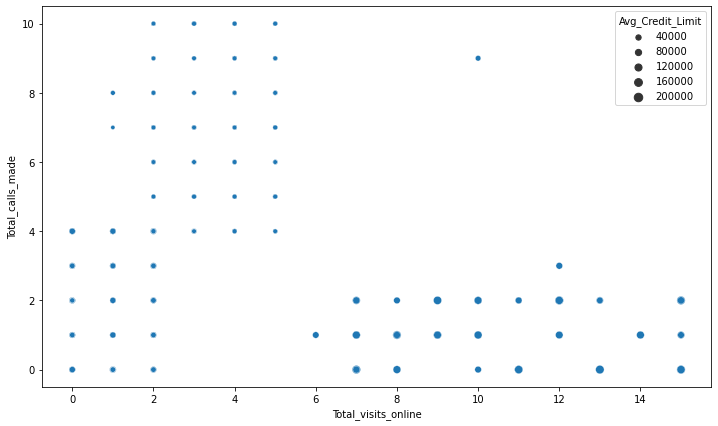

In [55]:
plt.figure(figsize=(12,7))
sns.scatterplot(x='Total_visits_online',y='Total_calls_made',size='Avg_Credit_Limit',data=data) 


Customers who visit less frequently online make more phone calls

People with Average credit limit >80000 make more frequent online visits

## K-Means

In [57]:
X = data.iloc[:,2:].values #Selecting the features
X.shape 


(660, 5)

As there is a difference in magnitude of Credit Limit and other features, we will scale the features

As there are not any negative values, we can use MinMaxScaler



In [58]:
from sklearn.preprocessing import MinMaxScaler

In [59]:
scaler = MinMaxScaler()

In [60]:
scaled_features = scaler.fit_transform(X)

In [61]:
from sklearn.cluster import KMeans

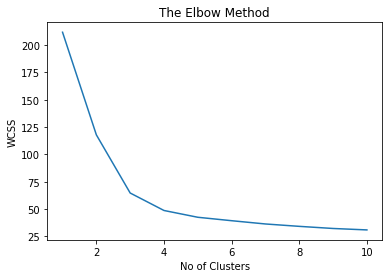

In [62]:
wcss = []#Within cluster sum of squares
for i in range(1,11):
    kmeans = KMeans(n_clusters= i , init = 'k-means++',random_state = 42)
    kmeans.fit(scaled_features)
    wcss.append(kmeans.inertia_) #Appending the wcss to the blank list
    
plt.plot(range(1,11),wcss)
plt.title('The Elbow Method')
plt.xlabel('No of Clusters')
plt.ylabel('WCSS')
plt.show()

As there is smooth descent afer n_clusters = 3 we will choose number of clusters as 3

In [63]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)
print(y_kmeans)

[0 0 0 2 0 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 2 0 0
 0 0 0 0 2 0 0 0 0 0 2 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 2 2 0 0 0 0 2 0 0
 2 0 2 2 0 0 0 0 0 0 0 0 

In [64]:
Segment = pd.DataFrame(y_kmeans,columns=['Segment']) #Converting the cluster to data frame
Segment

,Segment
0,0
1,0
2,0
3,2
4,0
...,...
655,0
656,0
657,1
658,1


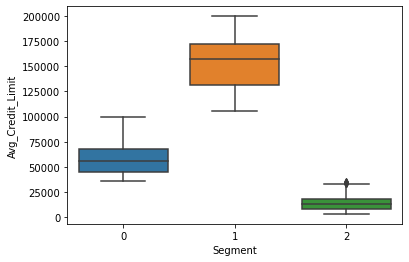

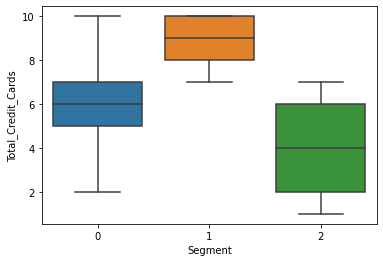

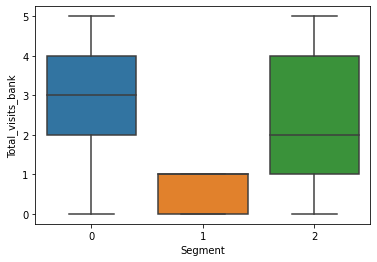

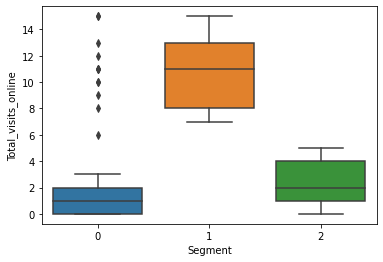

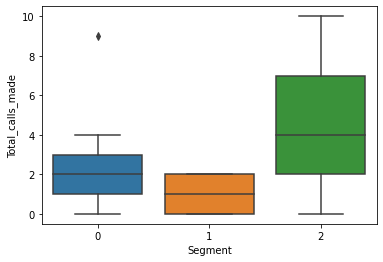

In [65]:
data1 = data.copy()
data1 =pd.concat([data1,Segment],axis=1)
features = ['Avg_Credit_Limit','Total_Credit_Cards','Total_visits_bank','Total_visits_online','Total_calls_made']
## Analyzing the results
for feature in features:  #Loop to plot boxplot of each cluster
    sns.boxplot(x='Segment',y = feature,data = data1)
    plt.show()

## Hierarchical Clustering

In [66]:
import scipy.cluster.hierarchy as sch

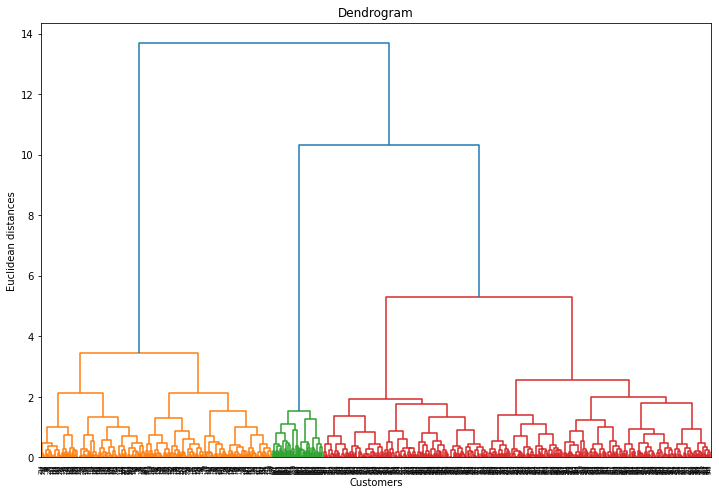

In [67]:
plt.figure(figsize=(12,8)) #Canvas size
dendrogram = sch.dendrogram(sch.linkage(scaled_features, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.show()

Based on the dendrogram number of clusters = 3

In [68]:
from scipy.cluster.hierarchy import cophenet
cophenet_ =np.mean(cophenet(sch.linkage(scaled_features)))
cophenet_

0.21442781737262284

In [69]:
from sklearn.cluster import AgglomerativeClustering #Importing lib
hc = AgglomerativeClustering(n_clusters = 3, affinity = 'euclidean', linkage = 'ward') #Euclidean distance, and ward linkage
y_hc = hc.fit_predict(X) #TrainingTheModel

In [70]:
y_hc


array([1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [71]:
df_yhc = pd.DataFrame(y_hc,columns=['HCluster'])

In [72]:
data1 = data.copy()
data1 = pd.concat([data1,df_yhc],axis=1)
data1.head()

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,HCluster
0,1,87073,100000,2,1,1,0,1
1,2,38414,50000,3,0,10,9,0
2,3,17341,50000,7,1,3,4,0
3,4,40496,30000,5,1,1,4,0
4,5,47437,100000,6,0,12,3,1


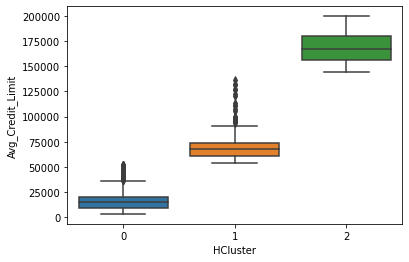

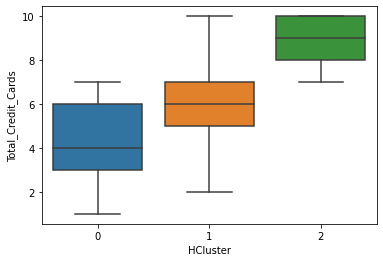

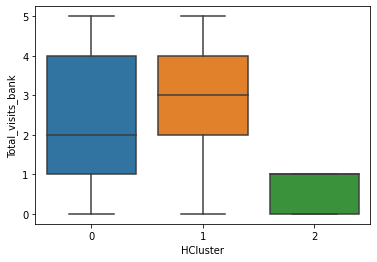

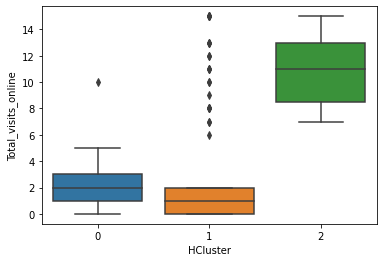

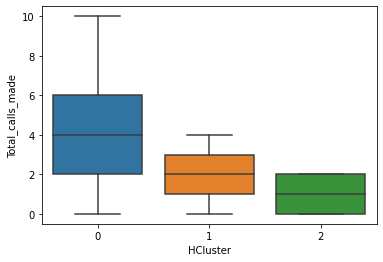

In [73]:
for feature in features:  #Loop to plot boxplot of each cluster
    sns.boxplot(x='HCluster',y=feature,data=data1)
    plt.show()

## Calculate the Average Silhoutte Score

In [74]:
from sklearn.metrics import silhouette_score
kmeans_score = silhouette_score(scaled_features,y_kmeans)
kmeans_score

0.14678066170008214

In [75]:
hc_score= silhouette_score(scaled_features,y_hc)
hc_score

0.1191477065513416

In [76]:
print("The silhoutte score of kmeans and Hierarchical Cluster are {} and {} respectively".format(kmeans_score,hc_score))

The silhoutte score of kmeans and Hierarchical Cluster are 0.14678066170008214 and 0.1191477065513416 respectively


### The hc_score is greater than kmeans_score

Its analysis is as follows −

+1 Score − Near +1 Silhouette score indicates that the sample is far away from its neighboring cluster.

0 Score − 0 Silhouette score indicates that the sample is on or very close to the decision boundary separating two neighboring clusters.

-1 Score − 1 Silhouette score indicates that the samples have been assigned to the wrong clusters.

